In [1]:
# 인구수를 분석, 증가추세임을 확인하고자 한다.

In [2]:
#시작 전 설정
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format='retina'
import pandas as pd
#원하는 한글폰트 지정
plt.rc("font",family="Malgun Gothic")
plt.rc("axes",unicode_minus=False) #Y축
#경고메세지 안보이게
import warnings
warnings.filterwarnings(action='ignore')
import seaborn as sns
import folium #지도시각화를 위한

In [3]:
# import
import pandas as pd
pop=pd.read_csv('E:/kim_jiwon/src/project_01/data/행정구역_읍면동_별_5세별_주민등록인구_2011년__2021.csv',encoding='cp949')
pop.head(5)

,행정구역(동읍면)별,항목,2011,2011.1,2011.2,2011.3,2011.4,2011.5,2011.6,2011.7,...,2020.11,2020.12,2020.13,2020.14,2020.15,2020.16,2020.17,2020.18,2020.19,2020.20
0,행정구역(동읍면)별,항목,0 - 4세,5 - 9세,10 - 14세,15 - 19세,20 - 24세,25 - 29세,30 - 34세,35 - 39세,...,55 - 59세,60 - 64세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
1,영종동,총인구수 (명),2180,2137,2142,1739,1195,1902,3170,3725,...,1377,1367,928,587,429,259,170,68,15,13
2,영종1동,총인구수 (명),-,-,-,-,-,-,-,-,...,1925,1639,1179,836,524,303,146,52,11,2
3,영종출장중산지소,총인구수 (명),-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
4,운서동,총인구수 (명),-,-,-,-,-,-,-,-,...,1460,1086,750,643,564,328,136,33,8,1


In [4]:
#영종도 전체의 나잇대에 따른 인구수변화를 보기

In [5]:
pop.info()
pop.isnull().sum()
#영종 1동, 영종출장증산지소의 -를 0으로 변경해주어야 함


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Columns: 212 entries, 행정구역(동읍면)별 to 2020.20
dtypes: object(212)
memory usage: 10.1+ KB


행정구역(동읍면)별    0
항목            0
2011          0
2011.1        0
2011.2        0
             ..
2020.16       0
2020.17       0
2020.18       0
2020.19       0
2020.20       0
Length: 212, dtype: int64

In [6]:
#pop.astype({'2016':'2020.20'})
#영종 1동은 2018년부터 영종동으로부터 분리되었으므로 2017년까지의 영종1동 인구수 데이터는 0으로 변경한다.
pop=pop.replace("-","0")
pop.head(4)

,행정구역(동읍면)별,항목,2011,2011.1,2011.2,2011.3,2011.4,2011.5,2011.6,2011.7,...,2020.11,2020.12,2020.13,2020.14,2020.15,2020.16,2020.17,2020.18,2020.19,2020.20
0,행정구역(동읍면)별,항목,0 - 4세,5 - 9세,10 - 14세,15 - 19세,20 - 24세,25 - 29세,30 - 34세,35 - 39세,...,55 - 59세,60 - 64세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
1,영종동,총인구수 (명),2180,2137,2142,1739,1195,1902,3170,3725,...,1377,1367,928,587,429,259,170,68,15,13
2,영종1동,총인구수 (명),0,0,0,0,0,0,0,0,...,1925,1639,1179,836,524,303,146,52,11,2
3,영종출장중산지소,총인구수 (명),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#형변환하고, 합산하여 영종도의 인구변화 추이를 확인한다.
#형변환
pop.loc[1:,"2011":"2020.20"]=pop.loc[1:,"2011":"2020.20"].astype(int)
pop
pop1=pop # 동별인구분석용

In [8]:
#합산을 구한다
pop.loc["영종인구","2011":"2020.20"]=pop.loc[1:5,"2011":"2020.20"].sum(axis=0)

In [9]:
pop=pop.loc[[0,"영종인구"],"2011":"2020.20"].T
pop

,0,영종인구
2011,0 - 4세,2313
2011.1,5 - 9세,2242
2011.2,10 - 14세,2284
2011.3,15 - 19세,1954
2011.4,20 - 24세,1426
...,...,...
2020.16,80 - 84세,1028
2020.17,85 - 89세,530
2020.18,90 - 94세,187
2020.19,95 - 99세,39


In [10]:
pop2=pop.index.to_frame()
pop2=pop2.rename(columns={0:"년도"})
pop2["년도"]=pop2["년도"].map(lambda x : int(x.split(".")[0]))
pop2

,년도
2011,2011
2011.1,2011
2011.2,2011
2011.3,2011
2011.4,2011
...,...
2020.16,2020
2020.17,2020
2020.18,2020
2020.19,2020


In [11]:
pop=pd.concat([pop,pop2],axis=1)
pop

,0,영종인구,년도
2011,0 - 4세,2313,2011
2011.1,5 - 9세,2242,2011
2011.2,10 - 14세,2284,2011
2011.3,15 - 19세,1954,2011
2011.4,20 - 24세,1426,2011
...,...,...,...
2020.16,80 - 84세,1028,2020
2020.17,85 - 89세,530,2020
2020.18,90 - 94세,187,2020
2020.19,95 - 99세,39,2020


In [12]:
pop.columns = ["연령대","주민등록인구수","년도"]
pop=pop.reset_index().loc[:,["년도","연령대","주민등록인구수"]]

pop.head(30)


,년도,연령대,주민등록인구수
0,2011,0 - 4세,2313
1,2011,5 - 9세,2242
2,2011,10 - 14세,2284
3,2011,15 - 19세,1954
4,2011,20 - 24세,1426
5,2011,25 - 29세,2153
6,2011,30 - 34세,3479
7,2011,35 - 39세,4047
8,2011,40 - 44세,3849
9,2011,45 - 49세,2788


In [13]:
pop.pivot("년도","연령대")

주민등록인구수                                                             \
연령대   0 - 4세 10 - 14세 100+ 15 - 19세 20 - 24세 25 - 29세 30 - 34세 35 - 39세   
년도                                                                        
2011    2313     2284    6     1954     1426     2153     3479     4047   
2012    2666     2559    7     2141     1737     2336     4040     4646   
2013    3427     3092    9     2652     2369     2813     5051     5734   
2014    3890     3530   12     2899     2729     3020     5323     6229   
2015    4118     3703   15     3128     3012     3476     5424     6653   
2016    3904     3843   18     3316     3249     3829     5097     6850   
2017    3721     4114   18     3517     3757     4666     5045     7066   
2018    3786     4307   18     3715     4421     5942     5491     7422   
2019    4476     4797   20     4129     5366     8070     7071     8616   
2020    4307     5235   21     4305     5236     8833     7802     8740   

                        ...                                               \
연령대  40 - 44세 45 - 49세  ... 50 - 54세 55 - 59세 60 - 64세 65 - 69세 70 - 74세   
년도                      ...                                                
2011     3849     2788  ...     2555     2046     1388     1254      925   
2012     4573     3148  ...     2789     2384     1568     1411     1100   
2013     5767     4077  ...     3325     2968     1904     1715     1359   
2014     6540     4637  ...     3666     3227     2220     1907     1501   
2015     6773     5235  ...     3811     3426     2556     1957     1566   
2016     7005     5839  ...     4060     3811     3040     2034     1736   
2017     7165     6503  ...     4344     4006     3307     2211     1812   
2018     7459     7040  ...     4982     4318     3703     2369     1957   
2019     8750     8247  ...     5969     4988     4343     2848     2257   
2020     9263     8725  ...     6779     5295     4677     3315     2427   

                                                   
연령대  75 - 79세 80 - 84세 85 - 89세 90 - 94세 95 - 99세  
년도                                                 
2011      591      353      184       82       16  
2012      650      414      193       81       16  
2013      828      470      233      103       28  
2014      929      547      248      109       26  
2015     1004      586      283      110       29  
2016     1122      638      311      116       38  
2017     1317      672      333      121       42  
2018     1453      769      376      128       44  
2019     1651      928      436      156       45  
2020     1763     1028      530      187       39  

[10 rows x 21 columns]

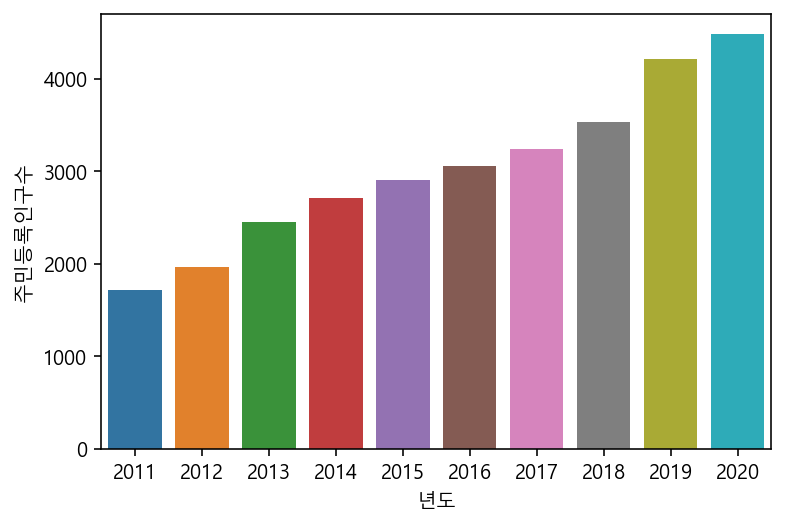

In [14]:
total_pop=sns.barplot(data=pop, x='년도',y='주민등록인구수', ci=None)
save_pop=total_pop.get_figure()
save_pop.savefig('E:/kim_jiwon/src/project_01/data/img/total_population.png')


In [15]:
pop.loc[:,"주민등록인구수"]=pop.loc[:,"주민등록인구수"].astype(int)
pop.info()
pop

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   년도       210 non-null    int64 
 1   연령대      210 non-null    object
 2   주민등록인구수  210 non-null    int32 
dtypes: int32(1), int64(1), object(1)
memory usage: 4.2+ KB


,년도,연령대,주민등록인구수
0,2011,0 - 4세,2313
1,2011,5 - 9세,2242
2,2011,10 - 14세,2284
3,2011,15 - 19세,1954
4,2011,20 - 24세,1426
...,...,...,...
205,2020,80 - 84세,1028
206,2020,85 - 89세,530
207,2020,90 - 94세,187
208,2020,95 - 99세,39


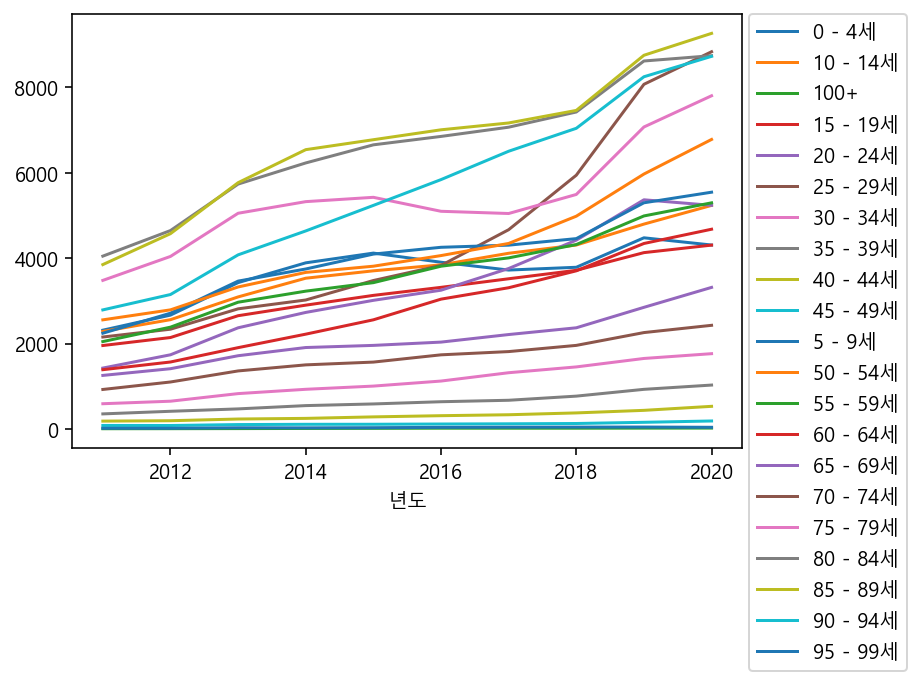

In [16]:

pop.pivot_table(index='년도',columns='연령대',values='주민등록인구수').plot()
plt.legend(bbox_to_anchor=(1.01,1),loc=0,borderaxespad=0)
plt.savefig('E:/kim_jiwon/src/project_01/data/img/total_population.png')

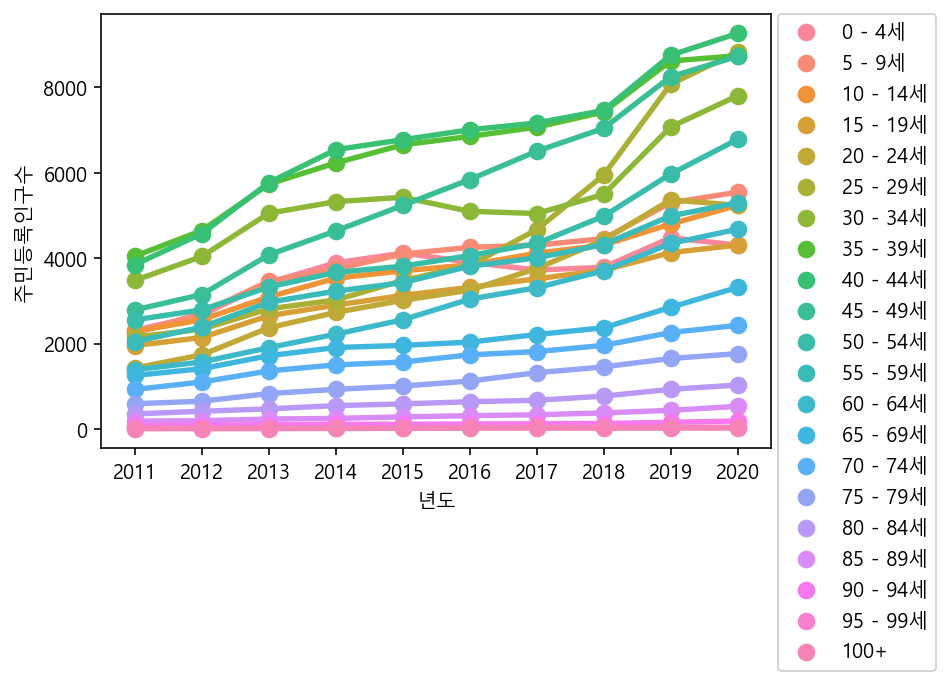

In [17]:
sns.pointplot(x="년도", y="주민등록인구수", hue="연령대", data=pop)
plt.legend(bbox_to_anchor=(1.01,1.0),loc=0,borderaxespad=0)

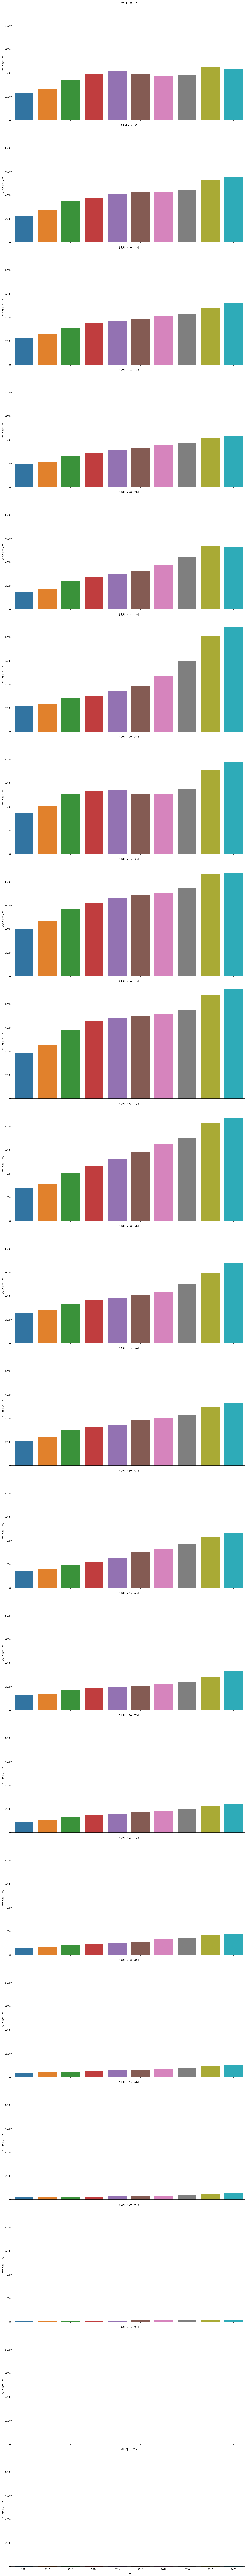

In [18]:
pop_byage=sns.catplot(data=pop, x="년도",y="주민등록인구수", kind="bar", col="연령대", col_wrap=1,
                      height=7, aspect=2, linewidth=2) # aspect은 세로:가로가 1:5

#save_img=pop_byage.get_figure()
pop_byage.savefig('E:/kim_jiwon/src/project_01/data/img/population_byage.png')

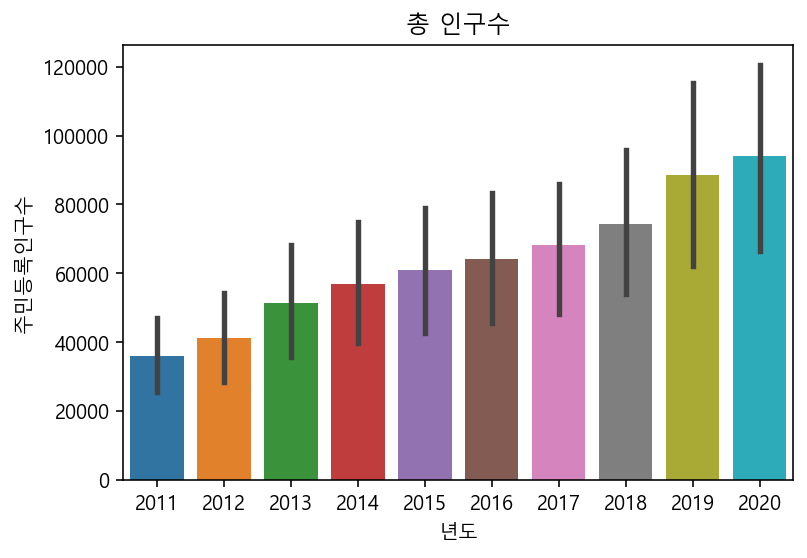

In [19]:
#총인구수도 증가세에 있다
sns.barplot(data=pop, x="년도",y="주민등록인구수", estimator=sum)
plt.title("총 인구수")
plt.show()

In [20]:
## 특정 연령대의 시게열별 증가세를 확인한다.

In [21]:
#순서정렬순서정렬
pop=pop.reset_index().loc[:,["연령대","년도","주민등록인구수"]]
pop
#pop.loc[:,"연령대"]

,연령대,년도,주민등록인구수
0,0 - 4세,2011,2313
1,5 - 9세,2011,2242
2,10 - 14세,2011,2284
3,15 - 19세,2011,1954
4,20 - 24세,2011,1426
...,...,...,...
205,80 - 84세,2020,1028
206,85 - 89세,2020,530
207,90 - 94세,2020,187
208,95 - 99세,2020,39


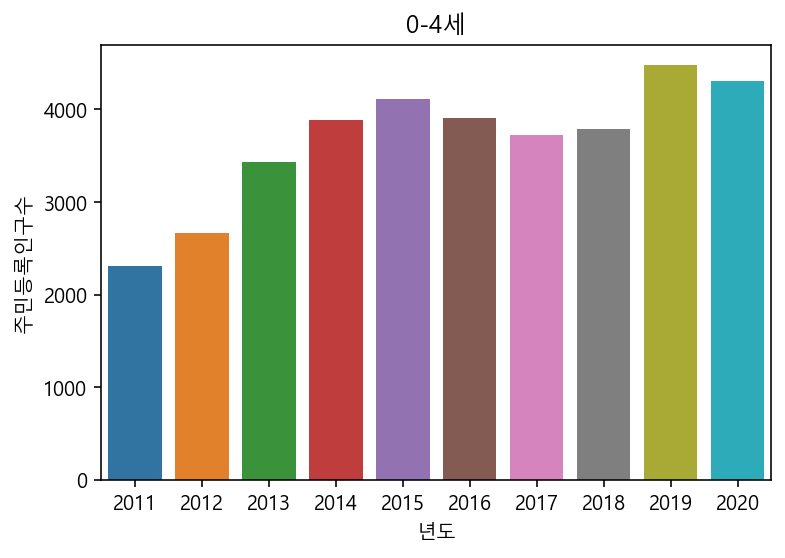

In [22]:
# 0-4세의 주민등록인구 조사.
pop_0to4=pop.loc[pop.연령대=='0 - 4세']
pop_0to4plot=sns.barplot(data=pop_0to4, x="년도",y="주민등록인구수", estimator=sum).set_title("0-4세")

save_img=pop_0to4plot.get_figure()
save_img.savefig('E:/kim_jiwon/src/project_01/data/img/population_0_4.png')

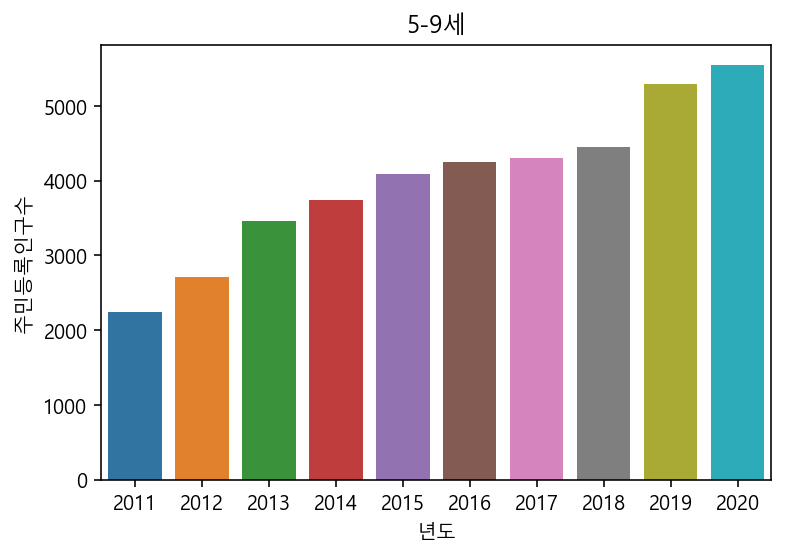

In [23]:
# 5-9세의 주민등록인구 조사.
pop_5to9=pop.loc[pop.연령대=='5 - 9세']
pop_5to9plot=sns.barplot(data=pop_5to9, x="년도",y="주민등록인구수", estimator=sum).set_title("5-9세")

save_img=pop_5to9plot.get_figure()
save_img.savefig('E:/kim_jiwon/src/project_01/data/img/population_5_9.png')

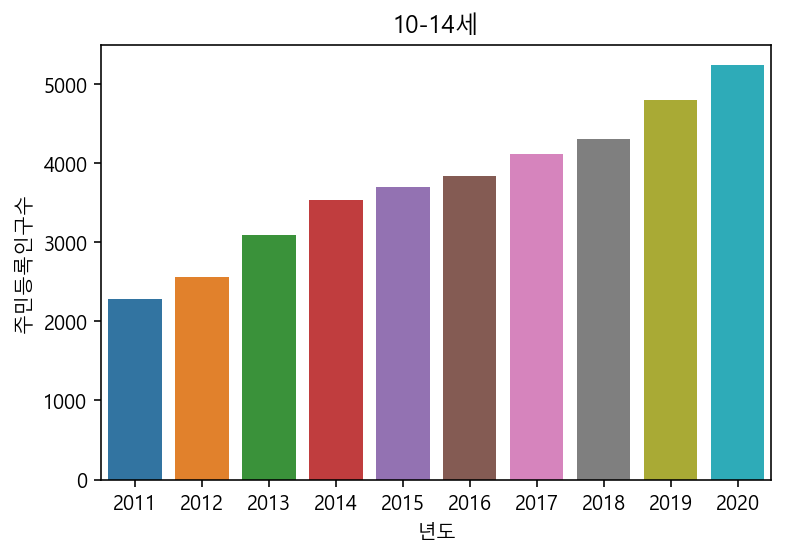

In [24]:
# 10-14세의 주민등록인구 조사.
pop_10to14=pop.loc[pop.연령대=='10 - 14세']
pop_10to14plot=sns.barplot(data=pop_10to14, x="년도",y="주민등록인구수", estimator=sum).set_title("10-14세")

save_img=pop_10to14plot.get_figure()
save_img.savefig('E:/kim_jiwon/src/project_01/data/img/population_10_14.png')

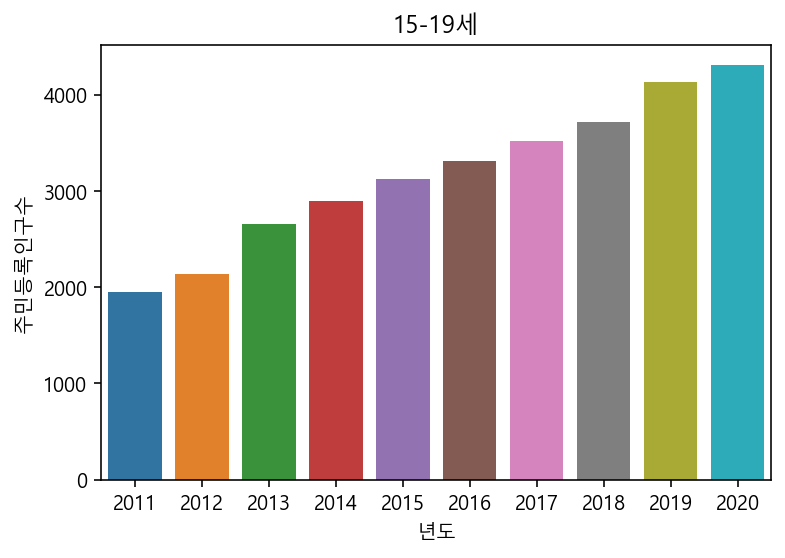

In [25]:
# 5-9세의 주민등록인구 조사.
pop_15to19=pop.loc[pop.연령대=='15 - 19세']
pop_15to19plot=sns.barplot(data=pop_15to19, x="년도",y="주민등록인구수", estimator=sum).set_title("15-19세")

save_img=pop_15to19plot.get_figure()
save_img.savefig('E:/kim_jiwon/src/project_01/data/img/population_15_19.png')

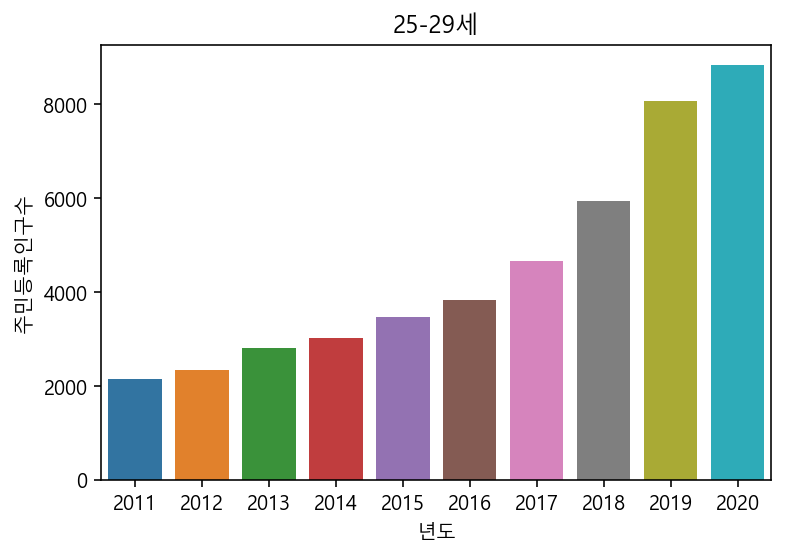

In [26]:
# 25-29세 인구변화 조사
pop_25to29=pop.loc[pop.연령대=='25 - 29세']
pop_25to29plot=sns.barplot(data=pop_25to29, x="년도",y="주민등록인구수", estimator=sum).set_title("25-29세")

save_img=pop_25to29plot.get_figure()
save_img.savefig('E:/kim_jiwon/src/project_01/data/img/population_25_29.png')

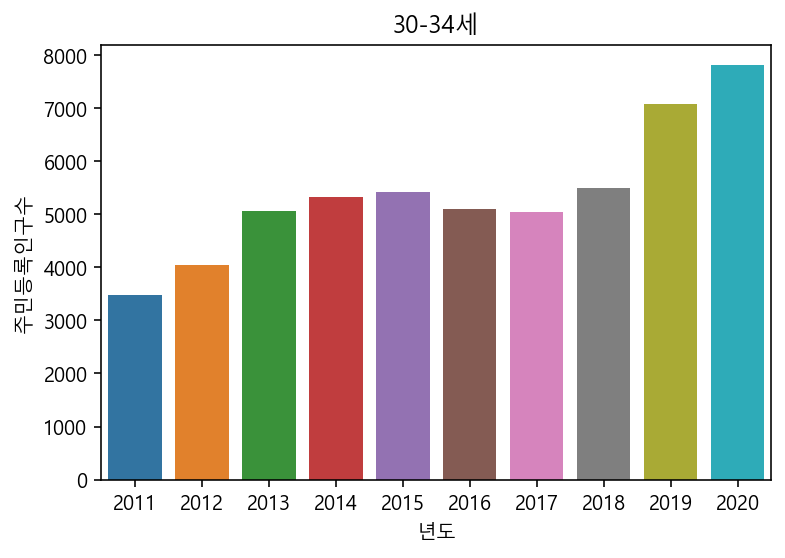

In [27]:
# 30-34세 인구변화 조사
pop_30to34=pop.loc[pop.연령대=='30 - 34세']
pop_30to34plot=sns.barplot(data=pop_30to34, x="년도",y="주민등록인구수", estimator=sum).set_title("30-34세")

save_img=pop_30to34plot.get_figure()
save_img.savefig('E:/kim_jiwon/src/project_01/data/img/population_30_34.png')

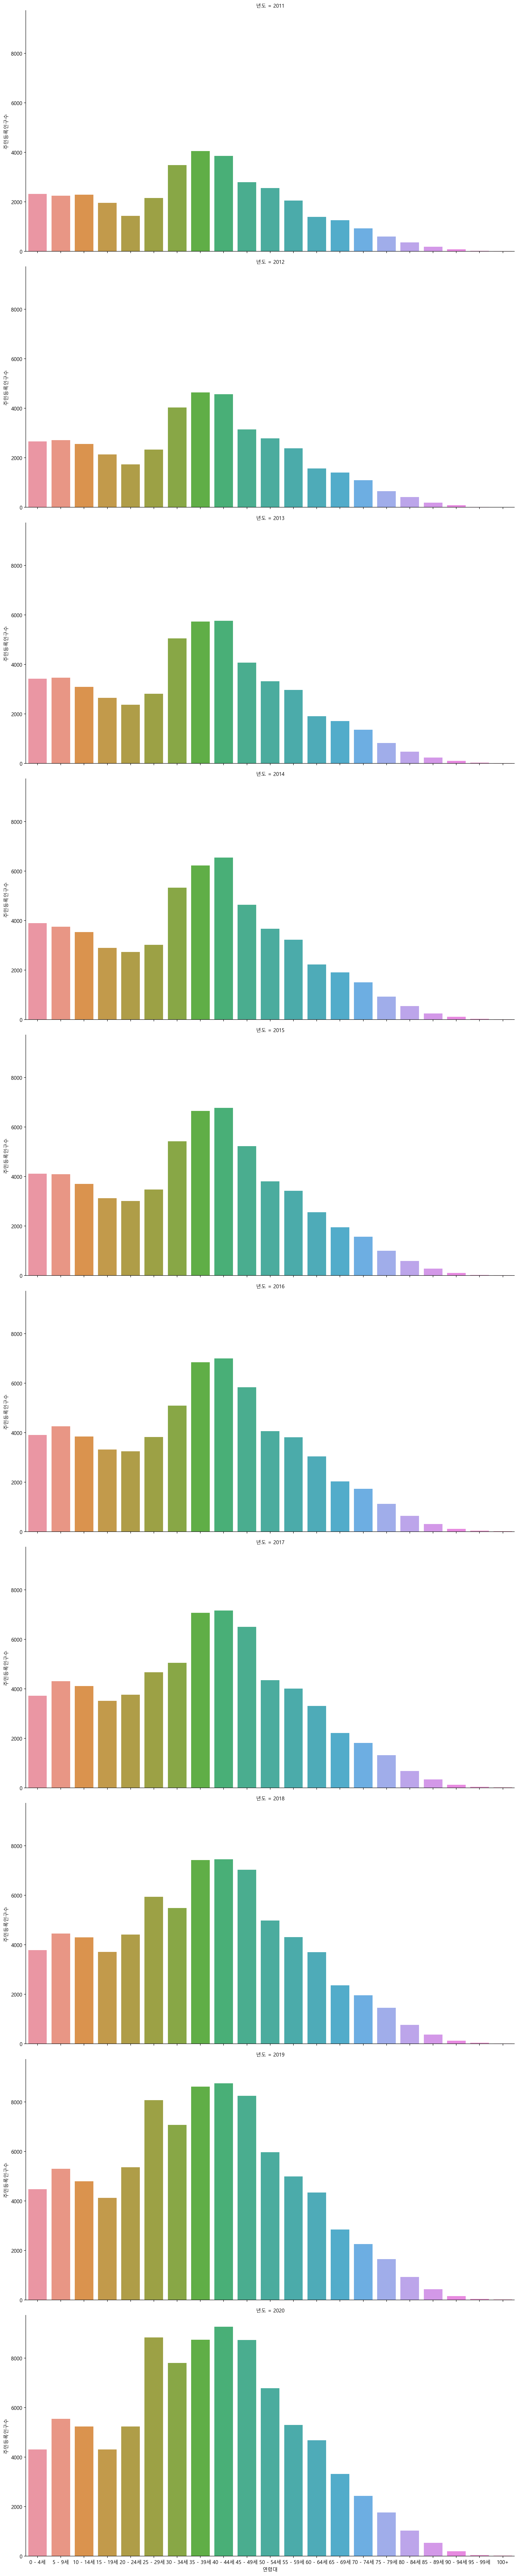

In [28]:
sns.catplot(data=pop, x="연령대",y="주민등록인구수", 
            kind="bar", col="년도", col_wrap=1,
           height=7, aspect=2, linewidth=5) # aspect은 세로:가로가 1:5

In [29]:
### 여기까지, 주민은 꾸준히 증가세를 유지하고 있음을 알 수 있다.
### 아래로, 보육 시설의 위치를 분석한다.
### 보건복지부의 평가인증어린이집 내용이 상가분석정보에 들어있는것을 확인하였다.
### 이하, 상가분석정보를 통해 분석한다.

In [30]:
import folium #지도시각화를 위한
import pandas as pd
arcadedata=pd.read_csv('E:/kim_jiwon/src/project_01/data/소상공인시장진흥공단_상가(상권)정보_인천_202012.csv',sep='|',encoding='utf-8')
# 사용하지 않는 열 제거
arcadedata=arcadedata.loc[:,~arcadedata.columns.str.contains('코드|번호|번지|지점명|정보', case=False)] 

#업종 추리기
arcadedata=arcadedata.loc[arcadedata.상권업종대분류명=='학문/교육'] #대분류
arcadedata=arcadedata.loc[arcadedata.상권업종중분류명=='유아교육'] #중분류

#영종지역만 추리기
loc1=arcadedata.loc[arcadedata.행정동명=='영종동']
loc2=arcadedata.loc[arcadedata.행정동명=='영종1동']
loc3=arcadedata.loc[arcadedata.행정동명=='운서동']
loc4=arcadedata.loc[arcadedata.행정동명=='용유동']
arcadedata2=pd.concat([loc1,loc2,loc3,loc4],axis=0)
#arcadedata=arcadedata.loc[arcadedata.법정동명=='영종동'|영종1동|운서동|용유동']


In [31]:
arcadedata2

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,건물명,도로명주소,경도,위도
7751,효성어린이집,학문/교육,유아교육,어린이집,보육시설 운영업,인천광역시,중구,영종동,중산동,대지,인천광역시 중구 중산동 1285-1,인천광역시 중구 백운로,NaN,인천광역시 중구 백운로 34,126.552609,37.500996
9925,라라어린이집,학문/교육,유아교육,어린이집,보육시설 운영업,인천광역시,중구,영종동,중산동,대지,인천광역시 중구 중산동 1872-1,인천광역시 중구 하늘달빛로,신명스카이뷰주얼리,인천광역시 중구 하늘달빛로 95,126.555902,37.485647
24047,에코비어린이집,학문/교육,유아교육,어린이집,보육시설 운영업,인천광역시,중구,영종동,중산동,대지,인천광역시 중구 중산동 1871-3,인천광역시 중구 하늘달빛로,우미린2단지,인천광역시 중구 하늘달빛로 113,126.554598,37.485820
24757,이편한숲쟁이어린이집,학문/교육,유아교육,어린이집,보육시설 운영업,인천광역시,중구,영종동,운남동,대지,인천광역시 중구 운남동 1680-2,인천광역시 중구 숲쟁이로,E편한세상영종하늘도시,인천광역시 중구 숲쟁이로 12,126.513268,37.478018
27271,영종수자인어린이집,학문/교육,유아교육,어린이집,보육시설 운영업,인천광역시,중구,영종동,중산동,대지,인천광역시 중구 중산동 1878-1,인천광역시 중구 은하수로,한양수자인,인천광역시 중구 은하수로 377,126.553555,37.490646
30681,구립하늘어린이집,학문/교육,유아교육,어린이집,보육시설 운영업,인천광역시,중구,영종동,운남동,대지,인천광역시 중구 운남동 444-3,인천광역시 중구 운중로,영종동경로당,인천광역시 중구 운중로 13-35,126.536270,37.494505
40327,영종자이어린이집,학문/교육,유아교육,어린이집,보육시설 운영업,인천광역시,중구,영종동,운남동,대지,인천광역시 중구 운남동 1550,인천광역시 중구 운남서로,영종자이아파트,인천광역시 중구 운남서로 7,126.531345,37.487867
87700,금산어린이집,학문/교육,유아교육,어린이집,보육시설 운영업,인천광역시,중구,영종동,운북동,대지,인천광역시 중구 운북동 582-5,인천광역시 중구 백운로351번길,금산어린이집,인천광역시 중구 백운로351번길 3,126.519944,37.505817
89936,하람어린이집,학문/교육,유아교육,어린이집,보육시설 운영업,인천광역시,중구,영종동,운남동,대지,인천광역시 중구 운남동 475-2,인천광역시 중구 운남로,NaN,인천광역시 중구 운남로 197,126.534003,37.495333
109089,새하늘어린이집,학문/교육,유아교육,어린이집,보육시설 운영업,인천광역시,중구,영종동,중산동,대지,인천광역시 중구 중산동 1312,인천광역시 중구 운중로,NaN,인천광역시 중구 운중로 191,126.552756,37.498087


<AxesSubplot:xlabel='경도', ylabel='위도'>

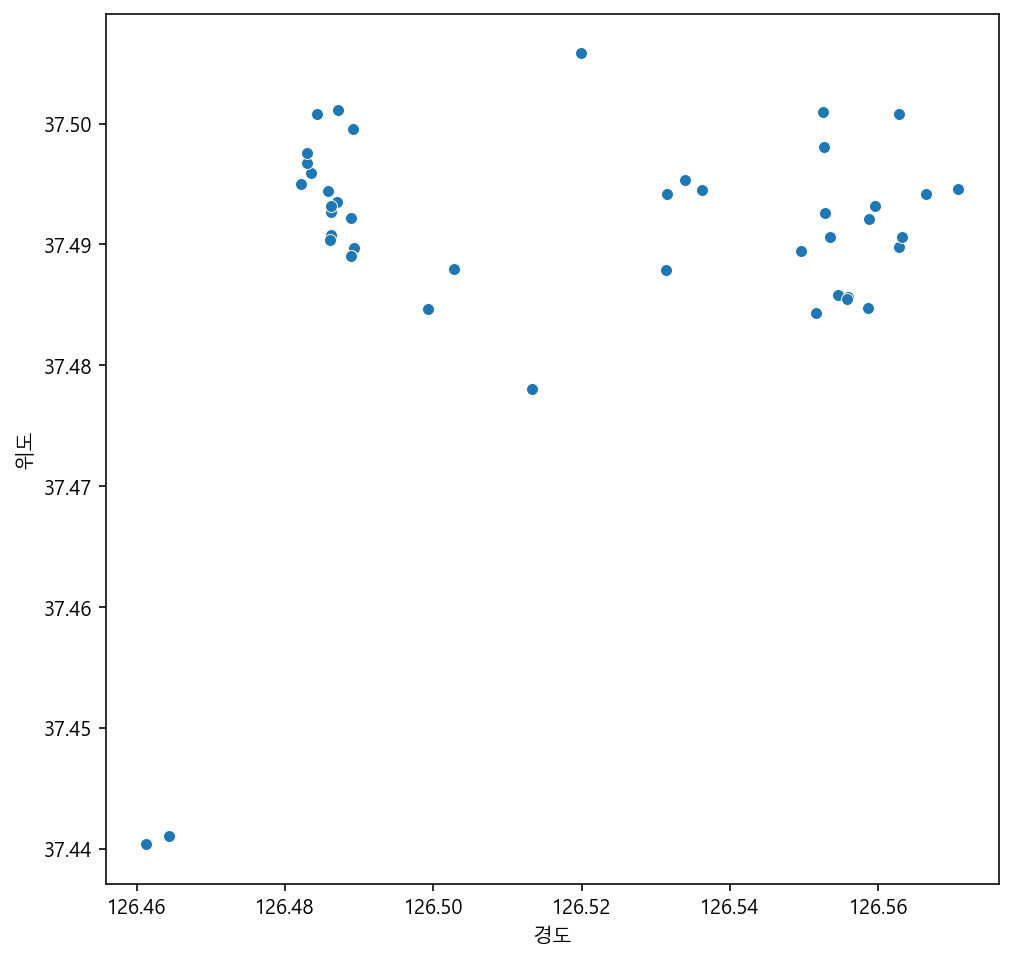

In [32]:
#단순 위치 확인
fig= plt.subplots(figsize=(8,8))
sns.scatterplot(x="경도",y='위도',data=arcadedata2)


In [33]:
#맵에 표시하기

In [34]:
lat_mean = arcadedata2["위도"].mean()
long_mean = arcadedata2["경도"].mean()
m = folium.Map(location=[lat_mean, long_mean], zoom_start=13)

for y in arcadedata2.index[:]:
    lat=arcadedata2.loc[y,"위도"]
    long = arcadedata2.loc[y,"경도"]
    tooltip = arcadedata2.loc[y,"상호명"]+" : " +arcadedata2.loc[y,"도로명주소"]
    folium.Marker(
    [lat, long], tooltip=tooltip
    ).add_to(m)


m

In [35]:
# 학교 데이터는 교육통게서비스의 를 사용하였다.
#단, 이 데이터만으로 영종 지역을 구분하기 어려워 불가피하게 데이터를 추가적으로 편집하였다.
#우선, 필요한 열을 추리고, 그 안에서 영종도 지역을 추려내었다.
#그리고 파일을 구글 스프레드 시트로 옮겨, 부가 기능인 Geocode by Awesome Table를 사용해 위도와 경도를 일괄로 받아보았다.



In [36]:
#파일 임포트
school=pd.read_csv('E:/kim_jiwon/src/project_01/data/2020년 유초중등 학교_영종 편집_210219.csv',sep=',',encoding='utf8')
school

,학교명,KEDI 학제,학생수_총계_계,주소,Latitude,Longitude
0,인천하늘고등학교,일반고등학교,663,인천광역시 중구 영종대로277번길 117 . 인천하늘고등학교 (운서동),37.495140,126.506780
1,인천영종고등학교,일반고등학교,933,인천광역시 중구 영종대로278번길 34 (운서동),37.496093,126.491539
2,인천공항고등학교,일반고등학교,792,인천광역시 중구 신도시북로 20 (운서동),37.497448,126.486037
3,인천과학고등학교,과학고등학교,211,인천광역시 중구 영종대로277번길 74-37 (운서동),37.491326,126.507405
4,인천국제고등학교,국제고등학교,400,인천광역시 중구 영종대로277번길 74-40 (운서동),37.490109,126.509171
5,영종국제물류고등학교,상업고등학교,206,인천광역시 중구 운남서로10번길 1 (운남동),37.490005,126.530923
6,인천공항초등학교,초등학교,568,인천광역시 중구 신도시남로 43 (운서동. 공항초등학교),37.491896,126.485909
7,인천영종초등학교금산분교장,초등학교,64,인천광역시 중구 백운로414번길 63-50 (운북동. 금산초등학교),37.510700,126.523099
8,인천별빛초등학교,초등학교,349,인천광역시 중구 은하수로 402 (운남동),37.491641,126.533114
9,인천용유초등학교무의분교장,초등학교,8,인천광역시 중구 대무의로 302-17 (무의동. 용유초등학교무의분교),37.387476,126.428779


<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

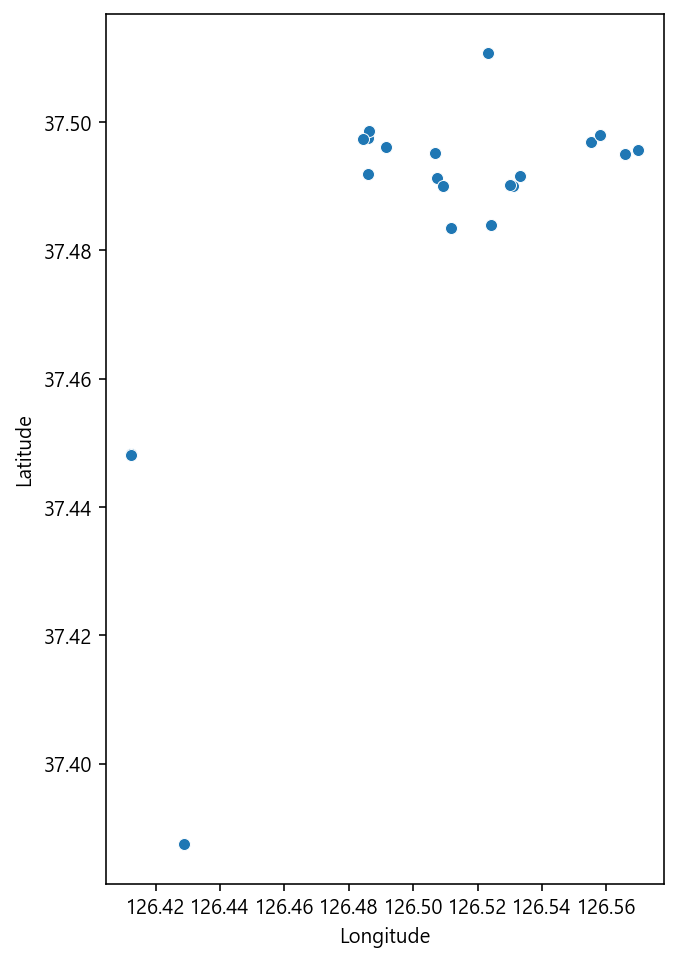

In [37]:
#단순 위치 확인
import matplotlib.pyplot as plt
import seaborn as sns
fig= plt.subplots(figsize=(5,8))
sns.scatterplot(x="Longitude",y='Latitude',data=school)

In [38]:
#컬럼명변경
school.columns=['학교명','학제','학생총계','주소','위도','경도']
school

,학교명,학제,학생총계,주소,위도,경도
0,인천하늘고등학교,일반고등학교,663,인천광역시 중구 영종대로277번길 117 . 인천하늘고등학교 (운서동),37.495140,126.506780
1,인천영종고등학교,일반고등학교,933,인천광역시 중구 영종대로278번길 34 (운서동),37.496093,126.491539
2,인천공항고등학교,일반고등학교,792,인천광역시 중구 신도시북로 20 (운서동),37.497448,126.486037
3,인천과학고등학교,과학고등학교,211,인천광역시 중구 영종대로277번길 74-37 (운서동),37.491326,126.507405
4,인천국제고등학교,국제고등학교,400,인천광역시 중구 영종대로277번길 74-40 (운서동),37.490109,126.509171
5,영종국제물류고등학교,상업고등학교,206,인천광역시 중구 운남서로10번길 1 (운남동),37.490005,126.530923
6,인천공항초등학교,초등학교,568,인천광역시 중구 신도시남로 43 (운서동. 공항초등학교),37.491896,126.485909
7,인천영종초등학교금산분교장,초등학교,64,인천광역시 중구 백운로414번길 63-50 (운북동. 금산초등학교),37.510700,126.523099
8,인천별빛초등학교,초등학교,349,인천광역시 중구 은하수로 402 (운남동),37.491641,126.533114
9,인천용유초등학교무의분교장,초등학교,8,인천광역시 중구 대무의로 302-17 (무의동. 용유초등학교무의분교),37.387476,126.428779


In [39]:
lat_mean = school["위도"].mean()
long_mean = school["경도"].mean()

In [40]:
#학교를 지도에 표시
m = folium.Map(location=[lat_mean, long_mean], zoom_start=11)

for s in school.index[:]:
    lat=school.loc[s,"위도"]
    long = school.loc[s,"경도"]
    tooltip = school.loc[s,"학교명"]+" : " +school.loc[s,"주소"]
    folium.Marker(
    [lat, long], tooltip=tooltip
    ).add_to(m)


m

In [41]:
### 내일부터 할 것
# 보육시설과 학교를 같이 지도에 표시
# 

In [42]:
#보육시설 및 초중고교를 분할하여 맵에 표시

In [43]:
midSch=school[school["학제"].str.contains("고등학교")]
midSch

,학교명,학제,학생총계,주소,위도,경도
0,인천하늘고등학교,일반고등학교,663,인천광역시 중구 영종대로277번길 117 . 인천하늘고등학교 (운서동),37.495140,126.506780
1,인천영종고등학교,일반고등학교,933,인천광역시 중구 영종대로278번길 34 (운서동),37.496093,126.491539
2,인천공항고등학교,일반고등학교,792,인천광역시 중구 신도시북로 20 (운서동),37.497448,126.486037
3,인천과학고등학교,과학고등학교,211,인천광역시 중구 영종대로277번길 74-37 (운서동),37.491326,126.507405
4,인천국제고등학교,국제고등학교,400,인천광역시 중구 영종대로277번길 74-40 (운서동),37.490109,126.509171
5,영종국제물류고등학교,상업고등학교,206,인천광역시 중구 운남서로10번길 1 (운남동),37.490005,126.530923


<AxesSubplot:xlabel='경도', ylabel='위도'>

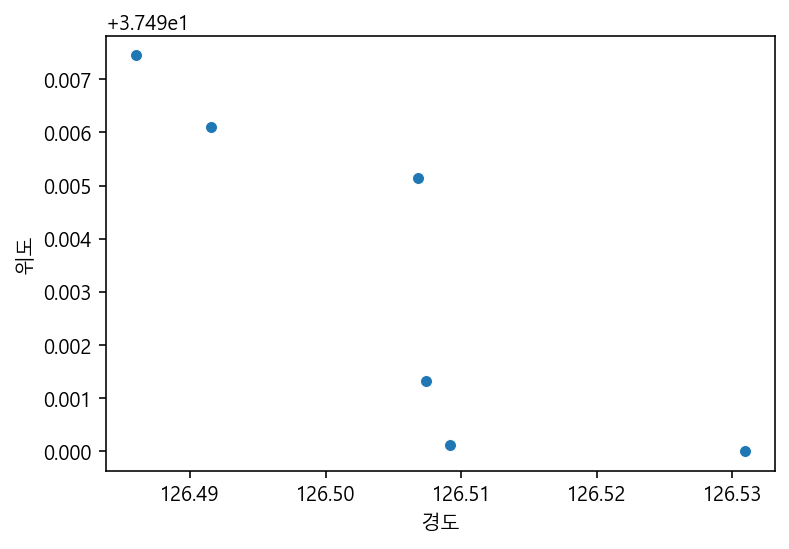

In [44]:
school

hiSch=school[school["학제"].str.contains("고등학교")]
midSch=school[school["학제"].str.contains("중학교")]
elemSch=school[school["학제"].str.contains("초등학교")]

#df.loc()
#sns.scatterplot(x="경도",y="위도",data=df_academy_seoul.loc[(df_academy_seoul.상권업종소분류명=='학원-입시')|(df_academy_seoul.상권업종소분류명=='어린이집')],hue='상권업종소분류명')
sns.scatterplot(x="경도",y="위도", data=hiSch)

In [45]:
m = folium.Map(location=[lat_mean, long_mean], zoom_start=12)

for i in hiSch.index:
    lat = hiSch.loc[i, "위도"]
    long = hiSch.loc[i, "경도"]
    tooltip = hiSch.loc[i, "학교명"] + " : " +hiSch.loc[i, "주소"]
    folium.CircleMarker([lat, long], tooltip=tooltip, 
                    radius=1, color="red").add_to(m)
for i in midSch.index:
    lat = midSch.loc[i, "위도"]
    long = midSch.loc[i, "경도"]
    tooltip = midSch.loc[i, "학교명"] + " : " +midSch.loc[i, "주소"]
    folium.CircleMarker([lat, long], tooltip=tooltip, 
                    radius=1, color="blue").add_to(m)

for i in elemSch.index:
    lat = elemSch.loc[i, "위도"]
    long = elemSch.loc[i, "경도"]
    tooltip = elemSch.loc[i, "학교명"] + " : " +elemSch.loc[i, "주소"]
    folium.CircleMarker([lat, long], tooltip=tooltip, 
                    radius=1, color="black").add_to(m)    
    
    
for i in arcadedata2.index:
    lat = arcadedata2.loc[i, "위도"]
    long = arcadedata2.loc[i, "경도"]
    tooltip = arcadedata2.loc[i, "상호명"] + " : " +arcadedata2.loc[i, "도로명주소"]
    folium.CircleMarker([lat, long], tooltip=tooltip, 
                    radius=1, color="orange").add_to(m)


m


In [46]:
m.save("data/map1.html")

In [47]:
#0-10세의 어린이가 보육시설을 필요로 한다고 가정할 때, 2020년을 기준으로 하나의 보육시설당 맡을 아이 수

latestdata=pop.loc[pop.년도==2020]
latestdata1=latestdata.loc[latestdata.연령대=='0 - 4세']
#latestdata2=latestdata.loc[latestdata.연령대=='5 - 9세']
#late3=pd.concat([latestdata1,latestdata2],axis=0)

latestdata1.주민등록인구수.sum()/arcadedata2.상호명.count()


86.14

In [48]:
pop

,연령대,년도,주민등록인구수
0,0 - 4세,2011,2313
1,5 - 9세,2011,2242
2,10 - 14세,2011,2284
3,15 - 19세,2011,1954
4,20 - 24세,2011,1426
...,...,...,...
205,80 - 84세,2020,1028
206,85 - 89세,2020,530
207,90 - 94세,2020,187
208,95 - 99세,2020,39


In [49]:
## 10세 미만 인구를 기준으로, 영종도의 보육시설 수는 충분한가를 확인
# 2020년 각 동별 10세 미만 인구와 보육시설 수
# import
byloc=pd.read_csv('E:/kim_jiwon/src/project_01/data/행정구역_읍면동_별_5세별_주민등록인구_2011년__2021.csv',encoding='cp949')
byloc=byloc.replace("-","0")
byloc.loc[1:,"2011":"2020.20"]=byloc.loc[1:,"2011":"2020.20"].astype(int) #형변환
#byloc
byloc1=byloc.loc[:,"행정구역(동읍면)별"] #동 정보 남기기 
byloc2=byloc.loc[:,"2020":"2020.20"] #인구 수 정보 붙이기
byloc=pd.concat([byloc1,byloc2],axis=1) #정보 합치기
byloc.T.reset_index(drop=True).T #인덱스 제거
byloc.columns= byloc.iloc[0] #헤더 변경
byloc=byloc.iloc[[1,2,4,5],:] #필요한 열 추리기. 증산지소는 영종1동에 합산되어 인구 0명이므로 여기서 제외
byloc

,행정구역(동읍면)별,0 - 4세,5 - 9세,10 - 14세,15 - 19세,20 - 24세,25 - 29세,30 - 34세,35 - 39세,40 - 44세,...,55 - 59세,60 - 64세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
1,영종동,394,533,603,613,863,1245,1149,1139,1151,...,1377,1367,928,587,429,259,170,68,15,13
2,영종1동,3198,3876,2967,1845,1590,2416,3666,5348,5356,...,1925,1639,1179,836,524,303,146,52,11,2
4,운서동,685,1079,1609,1780,2655,5011,2861,2095,2554,...,1460,1086,750,643,564,328,136,33,8,1
5,용유동,30,56,56,67,128,161,126,158,202,...,533,585,458,361,246,138,78,34,5,5


In [50]:
#지역별 보육시설 수
arcadedata2.groupby("행정동명").count().loc[:,"상호명"]


행정동명
영종1동    10
영종동     13
운서동     27
Name: 상호명, dtype: int64

In [51]:
test1 = byloc.loc[:,"행정구역(동읍면)별":"15 - 19세"]
test1.columns = ["행정동명","0 - 4세","5 - 9세","10 - 14세","15 - 19세"]

#인덱스 변경 
new_index = test1.iloc[:,0] 
test1 = test1.iloc[:,1:] 
test1.index = new_index 

test1


,0 - 4세,5 - 9세,10 - 14세,15 - 19세
행정동명,,,,
영종동,394,533,603,613
영종1동,3198,3876,2967,1845
운서동,685,1079,1609,1780
용유동,30,56,56,67


In [52]:
# 보육시설당 0-4세 아동의 수 구하기
test2= arcadedata2.groupby("행정동명").count().loc[:,"상호명"].to_frame()
test3=pd.concat([test1,test2],axis=1) #합치기
test3["1 어린이집당 5세 미만 아동수"]=test3['0 - 4세']/test3['상호명']
test3.loc[:,["0 - 4세","1 어린이집당 5세 미만 아동수"]]

,0 - 4세,1 어린이집당 5세 미만 아동수
영종동,394,30.3077
영종1동,3198,319.8
운서동,685,25.3704
용유동,30,NaN


In [53]:
# 보육시설당 0-9세 아동의 수 구하기
test3["1 어린이집당 9세 미만 아동수"]=(test3['0 - 4세']+test3['5 - 9세'])/test3['상호명']
test3.loc[:,["0 - 4세","5 - 9세","1 어린이집당 9세 미만 아동수"]]




,0 - 4세,5 - 9세,1 어린이집당 9세 미만 아동수
영종동,394,533,71.3077
영종1동,3198,3876,707.4
운서동,685,1079,65.3333
용유동,30,56,NaN


In [54]:
#학교당 10세-19세 청소년 수
test2= arcadedata2.groupby("행정동명").count().loc[:,"상호명"].to_frame()
test3=pd.concat([test1,test2],axis=1) #정보 합치기
test3["비율"]=test3['0 - 4세']/test3['상호명']
test3

,0 - 4세,5 - 9세,10 - 14세,15 - 19세,상호명,비율
영종동,394,533,603,613,13.0,30.3077
영종1동,3198,3876,2967,1845,10.0,319.8
운서동,685,1079,1609,1780,27.0,25.3704
용유동,30,56,56,67,NaN,NaN


In [55]:
school

,학교명,학제,학생총계,주소,위도,경도
0,인천하늘고등학교,일반고등학교,663,인천광역시 중구 영종대로277번길 117 . 인천하늘고등학교 (운서동),37.495140,126.506780
1,인천영종고등학교,일반고등학교,933,인천광역시 중구 영종대로278번길 34 (운서동),37.496093,126.491539
2,인천공항고등학교,일반고등학교,792,인천광역시 중구 신도시북로 20 (운서동),37.497448,126.486037
3,인천과학고등학교,과학고등학교,211,인천광역시 중구 영종대로277번길 74-37 (운서동),37.491326,126.507405
4,인천국제고등학교,국제고등학교,400,인천광역시 중구 영종대로277번길 74-40 (운서동),37.490109,126.509171
5,영종국제물류고등학교,상업고등학교,206,인천광역시 중구 운남서로10번길 1 (운남동),37.490005,126.530923
6,인천공항초등학교,초등학교,568,인천광역시 중구 신도시남로 43 (운서동. 공항초등학교),37.491896,126.485909
7,인천영종초등학교금산분교장,초등학교,64,인천광역시 중구 백운로414번길 63-50 (운북동. 금산초등학교),37.510700,126.523099
8,인천별빛초등학교,초등학교,349,인천광역시 중구 은하수로 402 (운남동),37.491641,126.533114
9,인천용유초등학교무의분교장,초등학교,8,인천광역시 중구 대무의로 302-17 (무의동. 용유초등학교무의분교),37.387476,126.428779


In [56]:
#영종도 전체에 학교 수는 충분한가?
ts1=school[school["주소"].str.contains("운서동")]
school.count().학교명

21

In [57]:
#10세-19세까지의 학생수 대비 학교 수 

school[school["학제"].str.contains("고등학교")].count()
school[school["학제"].str.contains("중학교")].count()
school[school["학제"].str.contains("초등학교")].count()
hiSch.count().학교명
midSch.count().학교명
elemSch.count().학교명


11

In [58]:
#학교당 10세-19세 청소년 수
test2= arcadedata2.groupby("행정동명").count().loc[:,"상호명"].to_frame()
test3=pd.concat([test1,test2],axis=1).sum(axis=0)
test3

(test3['10 - 14세']+test3['15 - 19세'])/school.학교명.count()

454.2857142857143

In [59]:
school.학생총계.sum()

12140

In [60]:
test3['10 - 14세']+test3['15 - 19세']

9540.0

In [61]:
#행정동명 임포트
loc=pd.read_csv('E:/kim_jiwon/src/project_01/data/학교_현황_행정동명.csv',sep=',',encoding="cp949")
loc

,학교명,행정동
0,인천하늘고등학교,운서동
1,인천영종고등학교,운서동
2,인천공항고등학교,운서동
3,인천과학고등학교,운서동
4,인천국제고등학교,운서동
5,영종국제물류고등학교,영종동
6,인천공항초등학교,운서동
7,인천영종초등학교금산분교장,영종동
8,인천별빛초등학교,영종1동
9,인천용유초등학교무의분교장,용유동


In [62]:
newschool=pd.concat([school,loc],axis=1).iloc[:,[0,1,2,3,4,5,7]]
newschool.groupby("행정동").count().학교명

행정동
영종1동    5
영종동     4
용유동     3
운서동     9
Name: 학교명, dtype: int64

In [63]:
newschool.groupby(["행정동","학제"]).count().학교명.to_frame()

학교명
행정동  학제         
영종1동 일반중학교     1
     초등학교      4
영종동  상업고등학교    1
     일반중학교     1
     초등학교      2
용유동  일반중학교     1
     초등학교      2
운서동  과학고등학교    1
     국제고등학교    1
     일반고등학교    3
     일반중학교     1
     초등학교      3

In [64]:
newschool.groupby(["행정동","학제"]).sum().학생총계.to_frame()

학생총계
행정동  학제          
영종1동 일반중학교    934
     초등학교    4001
영종동  상업고등학교   206
     일반중학교    808
     초등학교     508
용유동  일반중학교     43
     초등학교      56
운서동  과학고등학교   211
     국제고등학교   400
     일반고등학교  2388
     일반중학교   1025
     초등학교    1560

In [65]:
school2=newschool.groupby(["행정동","학제"]).sum().학생총계/newschool.groupby(["행정동","학제"]).count().학교명
school2=school2.to_frame().reset_index()
school2.columns = ["행정동","학제","학교당 학생 수"]
school2

,행정동,학제,학교당 학생 수
0,영종1동,일반중학교,934.00
1,영종1동,초등학교,1000.25
2,영종동,상업고등학교,206.00
3,영종동,일반중학교,808.00
4,영종동,초등학교,254.00
5,용유동,일반중학교,43.00
6,용유동,초등학교,28.00
7,운서동,과학고등학교,211.00
8,운서동,국제고등학교,400.00
9,운서동,일반고등학교,796.00


In [66]:
#동별인구 2020 구해보자...

In [67]:
pop1=pd.read_csv('E:/kim_jiwon/src/project_01/data/행정구역_읍면동_별_5세별_주민등록인구_2011년__2021.csv',encoding='cp949')
pop1=pop1.replace("-","0")
pop1.loc[1:,"2011":"2020.20"]=pop1.loc[1:,"2011":"2020.20"].astype(int)

#동별 2020년 합산을 구한다
a=pop1.loc[0:5,"행정구역(동읍면)별"].to_frame()
b=pop1.loc[0:5,"2020":"2020.20"]
pop2=pd.concat([a,b],axis=1)
pop2.columns=pop2.loc[0,:]
pop2=pop2.loc[[1,2,4,5],:]
pop2


,행정구역(동읍면)별,0 - 4세,5 - 9세,10 - 14세,15 - 19세,20 - 24세,25 - 29세,30 - 34세,35 - 39세,40 - 44세,...,55 - 59세,60 - 64세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
1,영종동,394,533,603,613,863,1245,1149,1139,1151,...,1377,1367,928,587,429,259,170,68,15,13
2,영종1동,3198,3876,2967,1845,1590,2416,3666,5348,5356,...,1925,1639,1179,836,524,303,146,52,11,2
4,운서동,685,1079,1609,1780,2655,5011,2861,2095,2554,...,1460,1086,750,643,564,328,136,33,8,1
5,용유동,30,56,56,67,128,161,126,158,202,...,533,585,458,361,246,138,78,34,5,5


In [68]:
# 학생수를 추린다.
# 조작적 정의에 의해 0-4세는 보육시설 수요층, 5-9세는 초등학교 수요층, 10-14세는 중학교 수요층, 15-19세는 고등학교 수요층
stud_pop=pop2.iloc[:,0:5]
stud_pop.columns=['행정동',"보육시설수요","초등학교수요","중학교수요","고등학교수요"]
stud_pop.index=stud_pop.loc[:,"행정동"]
stud_pop=stud_pop.iloc[:,1:5]
stud_pop


,보육시설수요,초등학교수요,중학교수요,고등학교수요
행정동,,,,
영종동,394,533,603,613
영종1동,3198,3876,2967,1845
운서동,685,1079,1609,1780
용유동,30,56,56,67


In [69]:
stud_pop.loc[:,"초등학교수요"].astype(int)

행정동
영종동      533
영종1동    3876
운서동     1079
용유동       56
Name: 초등학교수요, dtype: int32

In [70]:
elem_by_loc=loc.loc[loc.학교명.str.contains("초등학교")].groupby("행정동").count().reset_index()
elem_by_loc.columns=["행정동","초등학교 수"]
elem_by_loc.index=elem_by_loc.loc[:,"행정동"]
elem_by_loc=elem_by_loc.iloc[:,1]
elem_by_loc

행정동
영종1동    4
영종동     2
용유동     2
운서동     3
Name: 초등학교 수, dtype: int64

In [71]:
mid_by_loc=loc.loc[loc.학교명.str.contains("중학교")].groupby("행정동").count().reset_index()
mid_by_loc.columns=["행정동","중학교 수"]
mid_by_loc.index=mid_by_loc.loc[:,"행정동"]
mid_by_loc=mid_by_loc.iloc[:,1]
mid_by_loc

행정동
영종1동    1
영종동     1
용유동     1
운서동     1
Name: 중학교 수, dtype: int64

In [72]:
hi_by_loc=loc.loc[loc.학교명.str.contains("고등학교")].groupby("행정동").count().reset_index()
hi_by_loc.columns=["행정동","고등학교 수"]
hi_by_loc.index=hi_by_loc.loc[:,"행정동"]
hi_by_loc=hi_by_loc.iloc[:,1]
hi_by_loc

행정동
영종동    1
운서동    5
Name: 고등학교 수, dtype: int64

In [73]:
else_by_loc=arcadedata2.groupby("행정동명").count().상호명.reset_index()
else_by_loc.columns=["행정동","보육시설 수"]
else_by_loc.index=else_by_loc.loc[:,"행정동"]
else_by_loc=else_by_loc.iloc[:,1]
else_by_loc

행정동
영종1동    10
영종동     13
운서동     27
Name: 보육시설 수, dtype: int64

In [74]:
stud_pop=stud_pop.astype(int)

In [75]:
countall=pd.concat([else_by_loc,elem_by_loc,mid_by_loc,hi_by_loc.astype(int)],axis=1).fillna(0).astype(int)
countall

,보육시설 수,초등학교 수,중학교 수,고등학교 수
영종1동,10,4,1,0
영종동,13,2,1,1
운서동,27,3,1,5
용유동,0,2,1,0


In [76]:
demandper=pd.concat([stud_pop,countall],axis=1)
demandper.loc[:,"보육시설 하나당 수요인원"]=demandper.loc[:,"보육시설수요"]/demandper.loc[:,"보육시설 수"]
demandper.loc[:,"초등학교 하나당 수요인원"]=demandper.loc[:,"초등학교수요"]/demandper.loc[:,"초등학교 수"]
demandper.loc[:,"중학교 하나당 수요인원"]=demandper.loc[:,"중학교수요"]/demandper.loc[:,"중학교 수"]
demandper.loc[:,"고등학교 하나당 수요인원"]=demandper.loc[:,"고등학교수요"]/demandper.loc[:,"고등학교 수"]
demandper.replace(np.inf,0).loc[:,"보육시설 하나당 수요인원":"고등학교 하나당 수요인원"].astype(int)

#demandper.loc[:,"보육시설수당 수요인원":"고등학교수당 수요인원"]


NameError: name 'np' is not defined

In [ ]:
stud_pop.loc[:,["행정동","초등학교수요"]]

In [ ]:
newschool.groupby(["행정동","학제"]).sum().학생총계.to_frame()

In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap(demandper.replace(np.inf,0).loc[:,"보육시설 하나당 수요인원":"고등학교 하나당 수요인원"].astype(int),  annot=True, cmap="Blues",
           fmt=".0f", annot_kws={'size':50})

plt.savefig("E:/kim_jiwon/src/project_01/data/img/heatmap1.png")

In [ ]:
plt.figure(figsize=(6,8))
sns.heatmap(demandper.replace(np.inf,0).loc[:,"보육시설 하나당 수요인원":"고등학교 하나당 수요인원"].astype(int),  annot=True, cmap="Blues",
           fmt=".0f", annot_kws={'size':20})

plt.savefig("E:/kim_jiwon/src/project_01/data/img/heatmap2.png")